# Titanic - Machine Learning

This project aims to introduce the most important steps of data analysis and explore the different stages. We will use the data of Titanic survivors available on the Kaggle website at the following link:
https://www.kaggle.com/competitions/titanic/overview

You can download the dataset and explore all the information about it in the following link: https://www.kaggle.com/competitions/titanic/data

## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Reading the data


We will first use `pd.read_csv` to load the data from csv file to Pandas DataFrame:

In [3]:
data = pd.read_csv('train.csv')

After reading the data, we will now review the data to ensure it has been read correctly by using the command `head`:

In [40]:
#this will print first 5 rows in the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# number of rows and columns
data.shape

(891, 12)

## Data Preprocessing

Now we will use the info command to learn more about the data, such as the number of rows and columns, data types, and the number of missing values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dealing with Missing Data

You have three options to fix this:

*   Delete rows that contains missing valuse
*   Delete the whole column that contains missing values
*   Replace missing values with some value (Mean, Median, Mode, constant)







In [6]:
# to view the Missing valuse in each column:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are three columns contains Missing values: **Age, Cabin, Embarked**. <br>
In the Age column, we will fill the missing values with the mean since it is a simple and quick method to handle missing data and helps maintain the overall distribution of the dataset.

In [7]:

#fill the missing values in Age with the mean of Age column
#you can simply use 'filllna' function, or any other way such as SimpleImputer
data['Age'].fillna(data['Age'].mean(), inplace=True)


C:\Users\MA\AppData\Local\Temp\ipykernel_16704\1160632766.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [8]:
data['Age'].isnull().sum()

0

There are a large number of missing values in the Cabin column, so we will drop this column from the dataset.

In [9]:
data = data.drop(['Cabin'], axis=1)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In the Embarked column, there are only two missing values. Let's see what the categories in this column are.

In [11]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
data['Embarked'].mode()[0]

'S'

In [13]:
#fill the missing values in Embarked with the mode of Embarked column:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\MA\AppData\Local\Temp\ipykernel_16704\206429606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [14]:
data['Embarked'].isnull().sum()

0

### Drop useless columns

As you know, the PassengerId and Name of the Passenger do not affect the probability of survival. and ticket column does not have a clear relationship to the survival of passengers, so they will be dropped:

In [15]:
# Drop the PassengerId and Name Columns from the dataset:
data = data.drop(['PassengerId','Name','Ticket'], axis=1)

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


sibsp: 	# of siblings / spouses aboard the Titanic
parch: 	# of parents / children aboard the Titanic

In [17]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [18]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [19]:
data['family'] = data['SibSp']+data['Parch']
data.drop(['SibSp','Parch'], axis=1,inplace=True)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


### Dealing with Duplicates

Check if there are duplicates in the dataset:

In [21]:

#check if there are duplicates in the dataset:
data.duplicated().sum()



112

In [22]:
#drop the duplicates:
data.drop_duplicates(inplace=True)

### Encode Categorical Columns

Sex and Embarked columns values are text, we can't give this text directly to the machine learning model, so we need to replace this text values to meaningful numerical values.

In Age column we will replace all male values with 1 and all the female values with 0. <br>
and we will do the same in Embarked column: S, C, Q

In [23]:

data.replace({'Sex':{'male':1,'female':0}}, inplace=True)


C:\Users\MA\AppData\Local\Temp\ipykernel_16704\2647160475.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Sex':{'male':1,'female':0}}, inplace=True)


In [24]:
data['Embarked'].replace({'S':1,'C':2,'Q':3}, inplace=True)


C:\Users\MA\AppData\Local\Temp\ipykernel_16704\2702281184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].replace({'S':1,'C':2,'Q':3}, inplace=True)
C:\Users\MA\AppData\Local\Temp\ipykernel_16704\2702281184.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'].rep

In [25]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,1,22.0,7.2500,1,1
1,1,1,0,38.0,71.2833,2,1
2,1,3,0,26.0,7.9250,1,0
3,1,1,0,35.0,53.1000,1,1
4,0,3,1,35.0,8.0500,1,0


### Normailization

In [26]:
#الانحراف المعياري هو معدل انحراف الارقام عن المتوسط، يفترض يكون 1 في الحالة المثالية، وكل ما زاد عن 1 صار الوضع اسوء
data.std()

Survived     0.492523
Pclass       0.854573
Sex          0.484059
Age         13.717690
Fare        52.295104
Embarked     0.613074
family       1.520384
dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [28]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,1,-0.568808,-0.528020,1,1
1,1,1,0,0.598318,0.697228,2,1
2,1,3,0,-0.277027,-0.515104,1,0
3,1,1,0,0.379482,0.349299,1,1
4,0,3,1,0.379482,-0.512712,1,0


In [29]:
data.std()

Survived    0.492523
Pclass      0.854573
Sex         0.484059
Age         1.000642
Fare        1.000642
Embarked    0.613074
family      1.520384
dtype: float64


## Data Analysis

In this section, we will explore the data and the relationships between features using statistical analysis and visualization techniques. This will help us understand the underlying patterns and correlations in the dataset, providing valuable insights for model building.

describe() provides summary statistics for numerical columns, including count, mean, standard deviation, min, max, and quartiles. This function helps us understand the distribution and central tendencies of the data. However, in our Titanic dataset, while useful, it may not be the primary focus since many insights come from categorical features and their relationships with survival, which are better explored through other means.

In [ ]:
data.describe()

,Survived,Pclass,Age,Fare,family
count,779.000000,779.000000,779.000000,779.000000,779.000000
mean,0.412067,2.245186,29.797727,34.845116,0.942234
std,0.492523,0.854573,13.717690,52.295104,1.520384
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,21.500000,8.050000,0.000000
50%,0.000000,3.000000,29.699118,15.900000,0.000000
75%,1.000000,3.000000,36.000000,34.375000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


In [ ]:
# to understand more about data lets find the number of people survived and not survived
data['Survived'].value_counts()

,count
Survived,
0,458
1,321


#### Univariate Visualization

A Univariate plot could be for a continuous variable to understand the spread and distribution of the variable while for a discrete variable it could tell us the count

<Axes: xlabel='Survived', ylabel='count'>

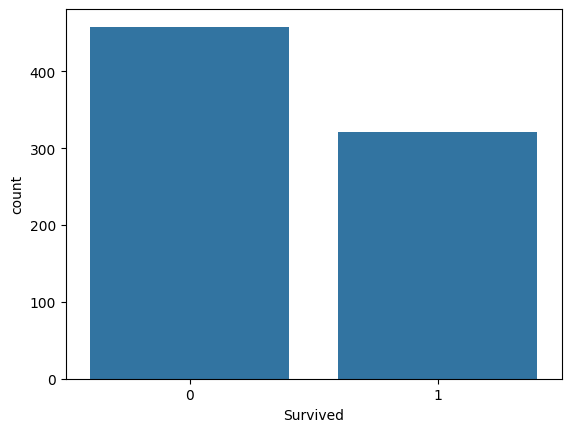

In [ ]:
# making a count plot for 'Survived' column
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Sex', ylabel='count'>

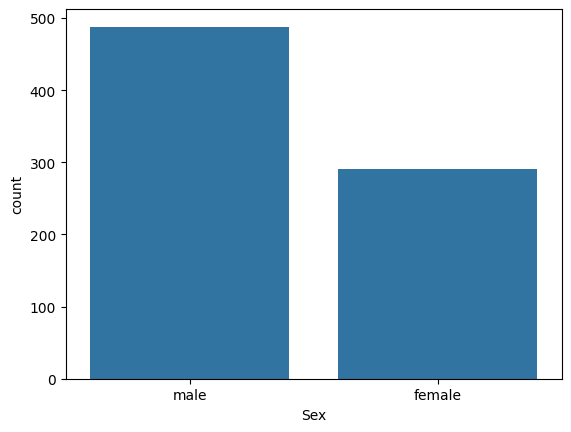

In [ ]:
# making a count plot for 'Sex' column
sns.countplot(x='Sex', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

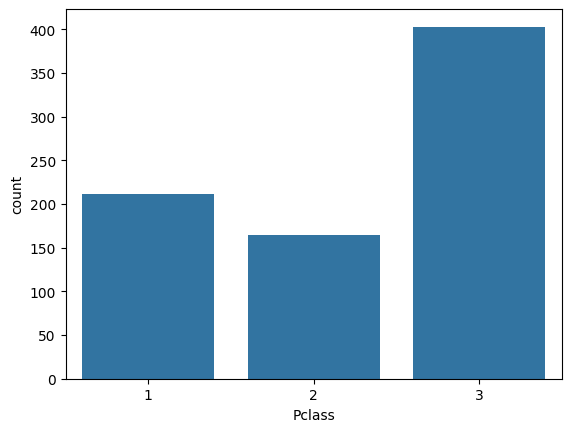

In [ ]:
# making a count plot for 'Pclass' column
sns.countplot(x='Pclass', data=data)

<ipython-input-473-965725594098>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x=data['Age'])


<Axes: ylabel='Density'>

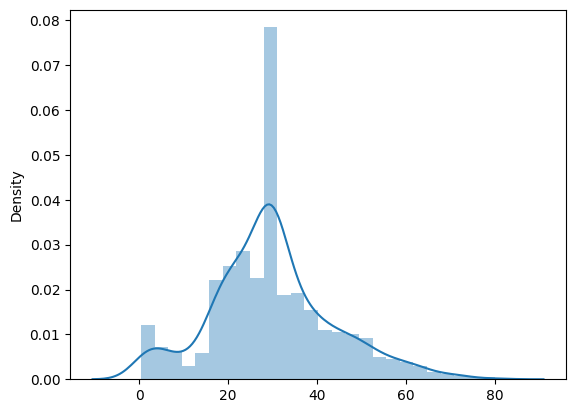

In [ ]:
sns.distplot( x=data['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

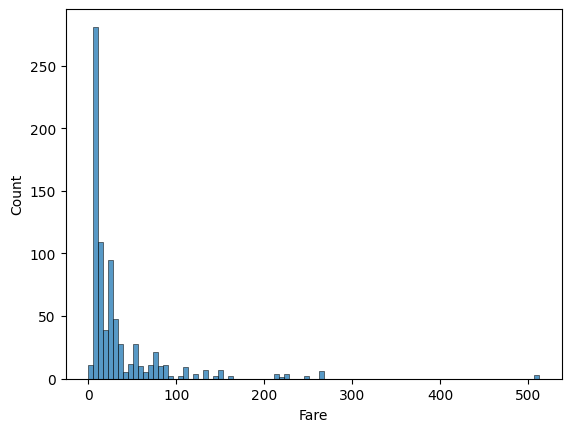

In [ ]:
sns.histplot( x=data['Fare'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Fare', ylabel='Count'>

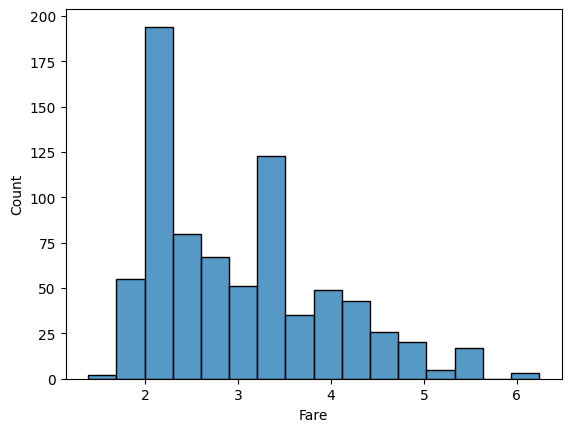

In [ ]:
sns.histplot(np.log(data['Fare']))

#### Bivariate Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sex', ylabel='count'>

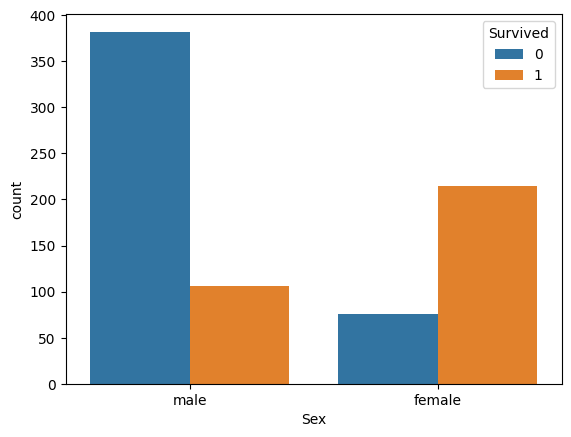

In [ ]:
# now lets compare the number of survived beasd on the gender
sns.countplot(x='Sex', hue='Survived', data=data)

as we can see, even we have more number of male in our dataset, the number of fmale who have survived is more. this is one of the very important insight that we can get from this data.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Pclass', ylabel='count'>

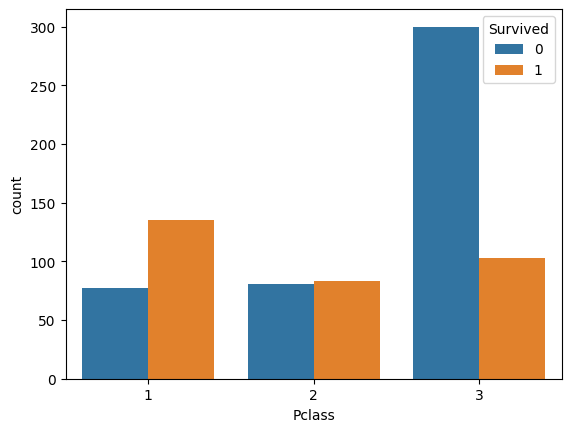

In [ ]:
# now lets compare the number of survived beasd on the Pclass
sns.countplot(x='Pclass', hue='Survived', data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Embarked', ylabel='count'>

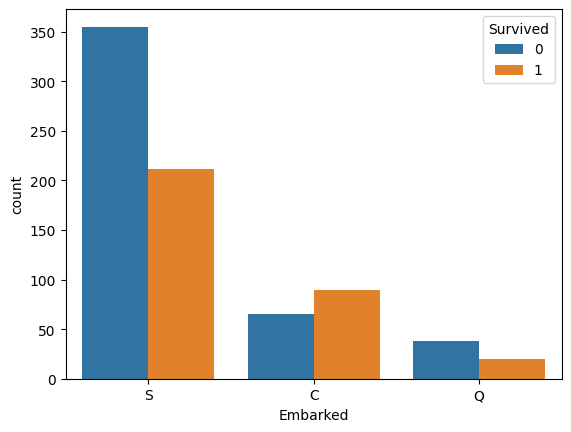

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=data)

You can do the same for the other columns to get more insights about the dataset.

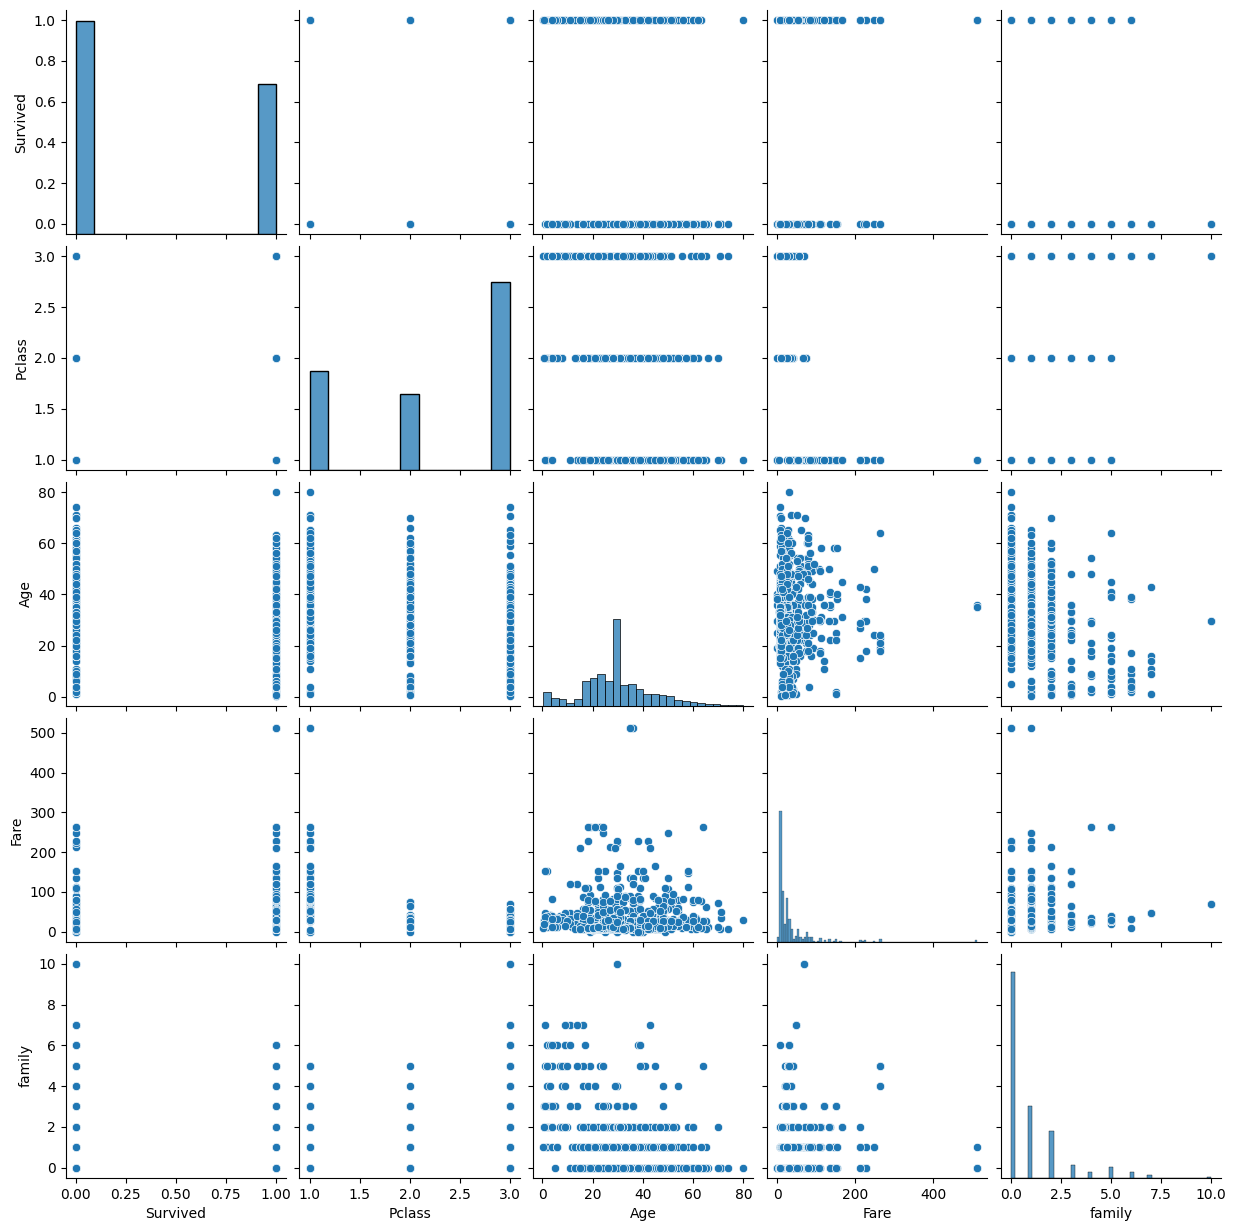

In [ ]:
sns.pairplot(data)

#### Correlation

Now to understand the relations between the features we can use the **correlation matrix** which shows the correlation coefficients between different features in a dataset. Each cell in the matrix represents the correlation between two features. The correlation coefficient ranges from **-1 to 1**, where:<br>

1 indicates a perfect positive correlation: as one feature increases, the other feature increases proportionally. <br>

-1 indicates a perfect negative correlation: as one feature increases, the other feature decreases proportionally.<br>

0 indicates no correlation: the features do not show any linear relationship.<br>

In [ ]:
data.corr(numeric_only=True)['Survived']

,Survived
Survived,1.000000
Pclass,-0.338073
Sex,-0.512654
Age,-0.079253
Fare,0.247270
family,0.012947
Embarked_C,0.167264
Embarked_Q,-0.038745
Embarked_S,-0.126820


The correlation values provide insights into how different features relate to the survival outcome in the Titanic dataset:

* Pclass: Negative correlation (-0.338). Higher classes (lower number) are more
likely to survive.
* Sex: Positive correlation (0.543). Females are more likely to survive.
* Age: Slight negative correlation (-0.070). Older passengers have a marginally lower chance of survival.
* SibSp: Slight negative correlation (-0.035). Having more siblings/spouses aboard slightly decreases survival chances.
* Parch: Slight positive correlation (0.082). Having more parents/children aboard slightly increases survival chances.
* Fare: Positive correlation (0.257). Passengers who paid higher fares are more likely to survive.
* Embarked: Slight positive correlation (0.107). The port of embarkation has a minor effect on survival.<br>
These correlations help identify which features may be important for predicting survival.

<Axes: >

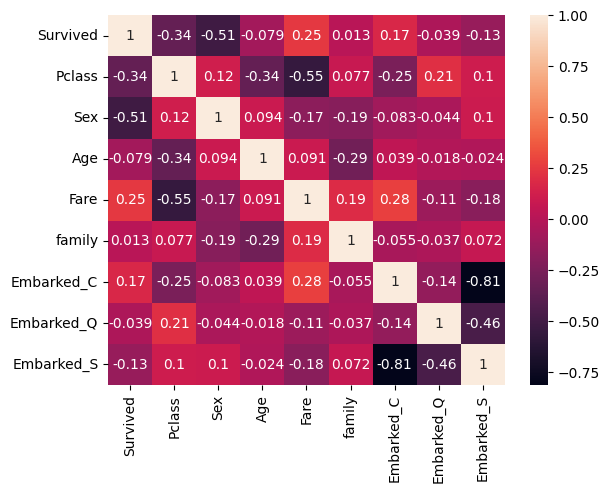

In [ ]:
sns.heatmap(data.corr(), annot=True)

### Split the dataset

**Separating features & Target** <br><br>
Separating features and target so that we can prepare the data for training machine learning models. In the Titanic dataset, the Survived column is the target variable, and the other columns are the features.

In [ ]:
x = data.drop(columns = ['Survived'], axis=1)
y = data['Survived']

**Splitting the data into training data & Testing data**

To build and evaluate a machine learning model effectively, it's essential to split the dataset into training and testing sets. The training set is used to train the model, allowing it to learn patterns and relationships within the data. The testing set, on the other hand, is used to evaluate the model's performance on unseen data, ensuring it can generalize well to new instances. This split helps prevent overfitting and provides a reliable estimate of the model's predictive accuracy.

In [ ]:

from sklearn.model_selection import train_test_split

# Split the data into training data & Testing data using train_test_split function :
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Normailization

In [ ]:
#الانحراف المعياري هو معدل انحراف الارقام عن المتوسط، يفترض يكون 1 في الحالة المثالية، وكل ما زاد عن 1 صار الوضع اسوء
data.std()

,0
Survived,0.492523
Pclass,0.854573
Sex,0.484059
Age,13.717690
Fare,52.295104
family,1.520384
Embarked_C,0.398512
Embarked_Q,0.262678
Embarked_S,0.445349


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[['Age', 'Fare']] = scaler.fit_transform(x_train[['Age', 'Fare']])

In [ ]:
x_test[['Age','Fare']] = scaler.transform(x_test[['Age','Fare']])

In [ ]:
print(x_train[['Age','Fare']].std())

Age     1.000804
Fare    1.000804
dtype: float64


In [ ]:
x_train.head()

,Pclass,Sex,Age,Fare,family,Embarked_C,Embarked_Q,Embarked_S
540,1,0,0.427734,0.656595,2,False,False,True
510,3,1,-0.078576,-0.514298,0,False,True,False
716,1,0,0.572394,3.554208,0,True,False,False
768,3,1,-0.028009,-0.210698,1,False,True,False
492,1,1,1.802003,-0.093146,0,False,False,True


In [ ]:
x_test.head()

,Pclass,Sex,Age,Fare,family,Embarked_C,Embarked_Q,Embarked_S
840,3,1,-0.729545,-0.511058,0,False,False,True
166,1,0,-0.028009,0.360401,1,False,False,True
628,3,1,-0.295566,-0.511598,0,False,False,True
115,3,1,-0.657216,-0.511058,0,False,False,True
20,2,1,0.355404,-0.176451,0,False,False,True


## **Model Training**

Model training is a crucial step in the machine learning where the algorithm learns from the training data to make predictions. **Logistic Regression** is a commonly used algorithm for binary classification tasks, such as predicting whether a passenger survived in the Titanic dataset. By training the model on our training data, we aim to find the best-fit parameters that minimize prediction errors. Once trained, this model can be used to predict outcomes on new, unseen data.

In [ ]:

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model and Train it on the training data:

model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

## Model Evaluation

Model evaluation is crucial in machine learning to assess the performance of a trained model on testing data. The **accuracy score**, a common evaluation metric, measures the proportion of correct predictions out of all predictions. This helps to gauge the model's effectiveness, ensure it generalizes well to new data, and guide further improvements.

In [ ]:


from sklearn.metrics import accuracy_score

# accuracy on testing data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of training data : ', test_data_accuracy)


Accuracy score of training data :  0.75
